In [780]:
import random
import networkx
import matplotlib.pyplot as plt
%matplotlib inline

In [781]:
grammar="""
sentence = adj noun verb adj noun2 | adj* noun
adj*=null|adj adj*
adj =adj_single 和 |adj_single 的 | null
adj_single = 漂亮 | 蓝色 | 好看
adv =安静地 |静静地
noun =猫 |女人 |男人
verb = adv 看着 | adv 坐着
noun2 = 桌子 | 皮球
"""

In [782]:
def build_grammar(grammar_str, split='='):
    grammar_pattern = {}
    for line in grammar_str.split('\n'):
        if not line: continue
        stm, expr = line.split(split)
        grammar_pattern[stm.strip()]=[e.split() for e in expr.split('|')]
    return grammar_pattern

In [783]:
gram_pattern = build_grammar(grammar)

In [784]:
gram_pattern

{'sentence': [['adj', 'noun', 'verb', 'adj', 'noun2'], ['adj*', 'noun']],
 'adj*': [['null'], ['adj', 'adj*']],
 'adj': [['adj_single', '和'], ['adj_single', '的'], ['null']],
 'adj_single': [['漂亮'], ['蓝色'], ['好看']],
 'adv': [['安静地'], ['静静地']],
 'noun': [['猫'], ['女人'], ['男人']],
 'verb': [['adv', '看着'], ['adv', '坐着']],
 'noun2': [['桌子'], ['皮球']]}

In [785]:
def generate(gram_p, target):
    if target not in gram_p: return target
    expr= random.choice(gram_p[target])
    tokens= [generate(gram_p, e) for e in expr]
    #return tokens
    #tokens=[e for e in expr]
    #print(tokens)
    return ''.join(t for t in tokens if t!='null')

In [786]:
gram_pattern['adj']

[['adj_single', '和'], ['adj_single', '的'], ['null']]

In [787]:
generate(gram_pattern,'adj')

'漂亮的'

In [788]:
generate(gram_pattern,'sentence')

'蓝色的好看的男人'

In [789]:
generate(gram_pattern, 'adj*')

''

In [790]:
def Generate(Sentence):
    return generate(gram_pattern,Sentence)

In [791]:
Generate('sentence')

'猫'

A simpler Solution 

In [792]:
def adj(): return random.choice('漂亮 |蓝色  |好看 '.split('|'))

def noun():return random.choice('猫| 女人 | 男人'.split('|'))

def verb():return random.choice('看着 | 坐着'.split('|'))

def nounend():return random.choice('桌子 | 皮球'.split('|'))

def sentence():return ''.join(''.join([adj(),noun(),verb(),nounend()]).split())


In [793]:
sentence()

'好看猫看着皮球'

###DFS

In [794]:
graph={
    'A':'B B B C',
    'B':'A C',
    'C':'A B D E',
    'D':'C',
    'E':'C F',
    'F':'E G',
    'G':'F'
}


In [795]:
#remove repeat
for k in graph:
    graph[k]=set(graph[k].split())

In [796]:
graph

{'A': {'B', 'C'},
 'B': {'A', 'C'},
 'C': {'A', 'B', 'D', 'E'},
 'D': {'C'},
 'E': {'C', 'F'},
 'F': {'E', 'G'},
 'G': {'F'}}

In [797]:
for elem in set('2, 3, 4, 5, 6, 7, 1000, 50, 无形'.replace(',','').split()):
    print(elem)

无形
5
50
7
6
1000
4
2
3


In [798]:
graph

{'A': {'B', 'C'},
 'B': {'A', 'C'},
 'C': {'A', 'B', 'D', 'E'},
 'D': {'C'},
 'E': {'C', 'F'},
 'F': {'E', 'G'},
 'G': {'F'}}

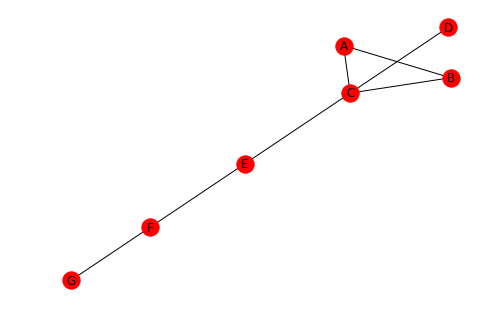

In [799]:
Graph =networkx.Graph(graph)
networkx.draw(Graph,with_labels=True)

##Breadth First Search

In [800]:
graph['B']

{'A', 'C'}

In [801]:
for e in graph['B']:
    print(e)

C
A


In [802]:
A=['C','B','D','D']
A.pop(0)
A+=graph['B']
A

['B', 'D', 'D', 'C', 'A']

In [803]:
['C','B','D','E'].pop(0)

'C'

In [804]:
seen=set()
need_visited =['A']
while need_visited:
    #print('Before pop:',need_visited)
    node = need_visited.pop(0)
    if node in seen:
        print('{} has been seen'.format(node))
        continue
    print('  I am looking at: {}'.format(node))
    need_visited += graph[node]
    #print('After pop:',need_visited)
    seen.add(node)


  I am looking at: A
  I am looking at: B
  I am looking at: C
C has been seen
A has been seen
  I am looking at: E
  I am looking at: D
B has been seen
A has been seen
  I am looking at: F
C has been seen
C has been seen
E has been seen
  I am looking at: G
F has been seen


##Depth First Search

In [805]:
graph_long={
    '1':'2 7',
    '2':'3',
    '3':'4',
    '4':'5',
    '5':'6 10',
    '7':'8',
    '6':'5',
    '8':'9',
    '9':'10',
    '10':'5 11',
    '11':'12',
    '12':'11',
}

In [806]:
for k in graph_long:
    graph_long[k]=graph_long[k].split()

In [807]:
graph_long

{'1': ['2', '7'],
 '2': ['3'],
 '3': ['4'],
 '4': ['5'],
 '5': ['6', '10'],
 '7': ['8'],
 '6': ['5'],
 '8': ['9'],
 '9': ['10'],
 '10': ['5', '11'],
 '11': ['12'],
 '12': ['11']}

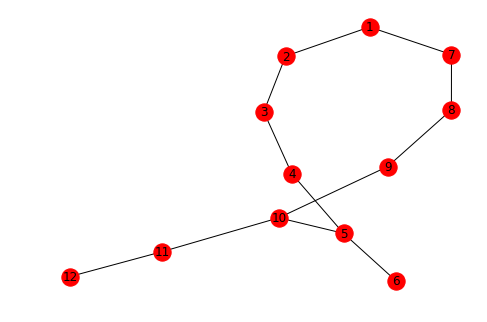

In [808]:
Graph_long=networkx.Graph(graph_long)
networkx.draw(Graph_long,with_labels=True)

In [809]:
def search(graph, contact_func):
    seen=set()
    need_visited=['1']
    
    while need_visited:
        node = need_visited.pop(0)
        if node in seen:
            print('{} has been seen'.format(node))
            continue
        print('I am looking {}'.format(node))
        seen.add(node)
        new_discovered=graph[node]
        need_visited=contact_func(new_discovered,need_visited)
    
        

In [810]:
def treat_new_discover_more_important(new,old):
    return new+old

def treat_old_discovered_more_important(new,old):
    return old+new

In [811]:
search(graph_long,treat_new_discover_more_important)

I am looking 1
I am looking 2
I am looking 3
I am looking 4
I am looking 5
I am looking 6
5 has been seen
I am looking 10
5 has been seen
I am looking 11
I am looking 12
11 has been seen
I am looking 7
I am looking 8
I am looking 9
10 has been seen


In [812]:
search(graph_long, treat_old_discovered_more_important)

I am looking 1
I am looking 2
I am looking 7
I am looking 3
I am looking 8
I am looking 4
I am looking 9
I am looking 5
I am looking 10
I am looking 6
10 has been seen
5 has been seen
I am looking 11
5 has been seen
I am looking 12
11 has been seen


In [813]:
from functools import partial

In [814]:
dfs=partial(search, contact_func=treat_new_discover_more_important)
bfs=partial(search, contact_func=treat_old_discovered_more_important)

In [815]:
dfs(graph_long)

I am looking 1
I am looking 2
I am looking 3
I am looking 4
I am looking 5
I am looking 6
5 has been seen
I am looking 10
5 has been seen
I am looking 11
I am looking 12
11 has been seen
I am looking 7
I am looking 8
I am looking 9
10 has been seen


In [816]:
bfs(graph_long)

I am looking 1
I am looking 2
I am looking 7
I am looking 3
I am looking 8
I am looking 4
I am looking 9
I am looking 5
I am looking 10
I am looking 6
10 has been seen
5 has been seen
I am looking 11
5 has been seen
I am looking 12
11 has been seen


In [817]:
BJ='BeiJing'
SZ='ShenZhen'
GZ='GuangZhou'
WH='WuHan'
HLJ='HeiLongJiang'
NY='New York City'
CM='ChiangMai'
SG='Singapore'
RC='RuiChang'

In [818]:
air_route={
    BJ: {SZ,GZ,WH,HLJ,NY},
    GZ: {WH,BJ,CM,SG},
    SZ: {BJ,SG},
    WH: {BJ,GZ},
    HLJ: {BJ},
    CM: {GZ},
    NY: {BJ},
    RC: {},
}

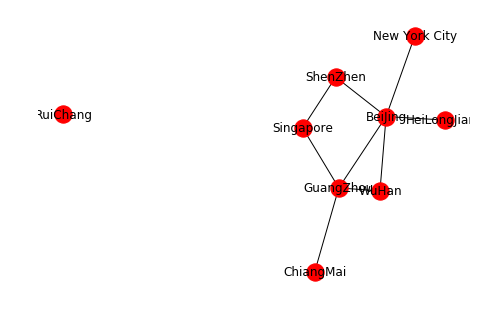

In [819]:
air_route=networkx.Graph(air_route)
networkx.draw(air_route,with_labels=True)

In [820]:
def search_destination(graph, start, dest):
    pathes=[[start]]
    seen=set()
    chosen_pathes=[]
    while pathes:
        path=pathes.pop(0)
        front=path[-1]
        if front in seen: continue
        
        for city in graph[front]:
            new_path=path+[city]
            pathes.append(new_path)
            if city==dest:return new_path
        seen.add(front)
    return chosen_pathes
    

In [821]:
search_destination(air_route, CM,NY)

['ChiangMai', 'GuangZhou', 'BeiJing', 'New York City']

In [822]:
A=[['Shanghai']]
C=A.pop(0)
C


['Shanghai']

In [823]:
def draw_route(cities):return '✈️ --->'.join(cities)

In [824]:
draw_route(search_destination(air_route,SZ,CM))

'ShenZhen✈️ --->BeiJing✈️ --->GuangZhou✈️ --->ChiangMai'

In [825]:
draw_route(search_destination(air_route,BJ,NY))

'BeiJing✈️ --->New York City'